In [1]:
#150170034 Yavuz Kanber
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import math
import random
from sklearn.model_selection import KFold

## Part A: Examine training sets

In [2]:
df1 = pd.read_csv("train1.csv") 
df2 = pd.read_csv("train2.csv") 
df1_class0 = df1[df1['y']==0]
df1_class0 = df1_class0[['x1','x2']]
df1_class1 = df1[df1['y']==1]
df1_class1 = df1_class1[['x1','x2']]
df2_class0 = df2[df2['y']==0]
df2_class0 = df2_class0[['x1','x2']]
df2_class1 = df2[df2['y']==1]
df2_class1 = df2_class1[['x1','x2']]

<ipython-input-3-a017c140b310>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
<ipython-input-3-a017c140b310>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


[Text(0, -1.0, ''), Text(0, 0.0, 'x1'), Text(0, 1.0, 'x2'), Text(0, 2.0, '')]

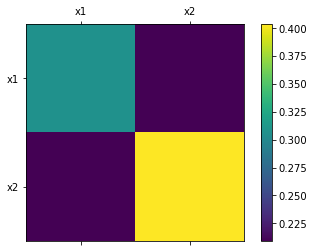

In [3]:
def covariance_matrix_calculator(df1_class):
    x1db = df1_class['x1']
    x2db = df1_class['x2']
    var1 = np.var(x1db)
    var2 = np.var(x2db)
    mean1 = np.mean(x1db)
    mean2 = np.mean(x2db)
    sum = 0
    for i, row in df1_class.iterrows():
        sum += (row['x1'] - mean1) * (row['x2'] - mean2)
        
    sum = sum / len(df1_class)        
    return np.matrix([[var1 , sum],[sum,var2]])

            
cov_mtrx1_db0_class0 = covariance_matrix_calculator(df1_class0)
cov_mtrx2_db0_class1 = covariance_matrix_calculator(df1_class1)
cov_mtrx3_db1_class0 = covariance_matrix_calculator(df2_class0)
cov_mtrx4_db1_class1 = covariance_matrix_calculator(df2_class1)

cov_mtrx1_db0_class0 = cov_mtrx1_db0_class0.round(8)
cov_mtrx2_db0_class1 = cov_mtrx2_db0_class1.round(8)
cov_mtrx3_db1_class0 = cov_mtrx3_db1_class0.round(8)
cov_mtrx4_db1_class1 = cov_mtrx4_db1_class1.round(8)

alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx1_db0_class0,interpolation='nearest') #cov. matrix of dataset0 class 0
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

<ipython-input-4-9341a0143073>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
<ipython-input-4-9341a0143073>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


[Text(0, -1.0, ''), Text(0, 0.0, 'x1'), Text(0, 1.0, 'x2'), Text(0, 2.0, '')]

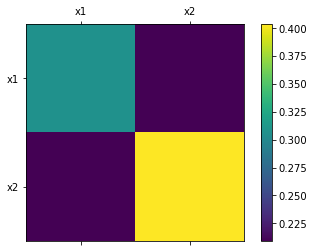

In [4]:

#---------
alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx2_db0_class1,interpolation='nearest') #cov. matrix of dataset0 class 1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)
#---------

<ipython-input-5-07fe487764e0>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
<ipython-input-5-07fe487764e0>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


[Text(0, -1.0, ''), Text(0, 0.0, 'x1'), Text(0, 1.0, 'x2'), Text(0, 2.0, '')]

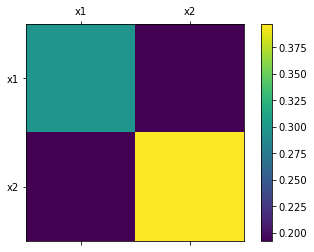

In [5]:
alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx3_db1_class0,interpolation='nearest') #cov. matrix of dataset1 class 0
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

<ipython-input-6-509d8c49cce7>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+alpha)
<ipython-input-6-509d8c49cce7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+alpha)


[Text(0, -1.0, ''), Text(0, 0.0, 'x1'), Text(0, 1.0, 'x2'), Text(0, 2.0, '')]

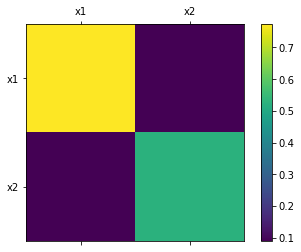

In [6]:
alpha = ['x1', 'x2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cov_mtrx4_db1_class1,interpolation='nearest') #cov. matrix of dataset1 class 1
fig.colorbar(cax)
ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

# All 4 variable tuples are dependent. Last tuple is highly dependent. All tuples have positive covariance

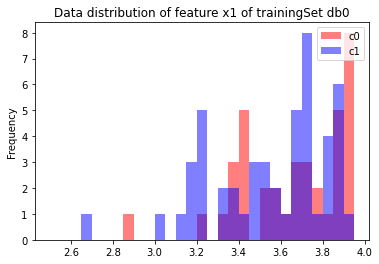

In [7]:
db0_ftrx1_c0 = df1_class0['x1']
db0_ftrx1_c1 = df1_class1['x1']
plt.gca().set(title='Data distribution of feature x1 of trainingSet db0', ylabel='Frequency')
bins = np.arange(2.5,4,0.05)
plt.hist(db0_ftrx1_c0, bins = bins , color = 'red', alpha = 0.5, label= 'c0')
plt.hist(db0_ftrx1_c1, bins = bins , color = 'blue' , alpha = 0.5, label ='c1')
plt.legend(loc="upper right")

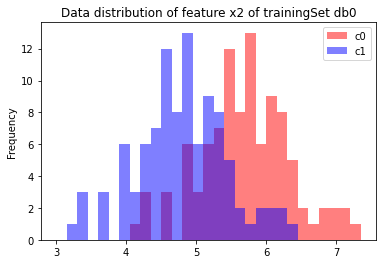

In [8]:
db0_ftrx2_c0 = df1_class0['x2']
db0_ftrx2_c1 = df1_class1['x2']
plt.gca().set(title='Data distribution of feature x2 of trainingSet db0', ylabel='Frequency')
bins = np.arange(3.0,7.5,0.15)
plt.hist(db0_ftrx2_c0, bins = bins , color = 'red', alpha = 0.5, label= 'c0')
plt.hist(db0_ftrx2_c1, bins = bins , color = 'blue' , alpha = 0.5, label ='c1')
plt.legend(loc="upper right")

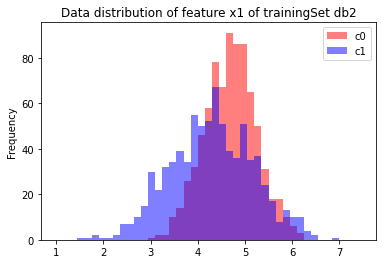

In [9]:
db1_ftrx1_c0 = df2_class0['x1']
db1_ftrx1_c1 = df2_class1['x1']
plt.gca().set(title='Data distribution of feature x1 of trainingSet db2', ylabel='Frequency')
bins = np.arange(1,7.5,0.15)
plt.hist(db1_ftrx1_c0, bins = bins , color = 'red', alpha = 0.5, label= 'c0')
plt.hist(db1_ftrx1_c1, bins = bins , color = 'blue' , alpha = 0.5, label ='c1')
plt.legend(loc="upper right")

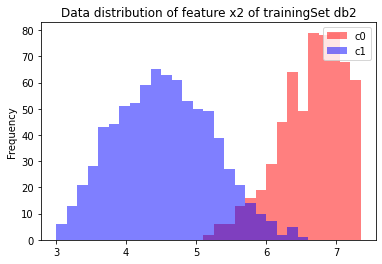

In [10]:
db1_ftrx2_c0 = df2_class0['x2']
db1_ftrx2_c1 = df2_class1['x2']
plt.gca().set(title='Data distribution of feature x2 of trainingSet db2', ylabel='Frequency')
bins = np.arange(3.0,7.5,0.15)
plt.hist(db1_ftrx2_c0, bins = bins , color = 'red', alpha = 0.5, label= 'c0')
plt.hist(db1_ftrx2_c1, bins = bins , color = 'blue' , alpha = 0.5, label ='c1')
plt.legend(loc="upper right")

# Database2 classes are more distinguishable than database1. Classifying will be more reliable.

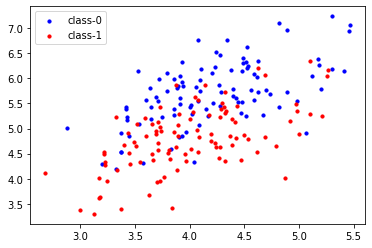

In [11]:
plt.scatter(db0_ftrx1_c0,db0_ftrx2_c0,c ='blue', s = 10 , label = 'class-0')
plt.scatter(db0_ftrx1_c1,db0_ftrx2_c1,c ='red', s = 10 , label = 'class-1')
plt.legend(loc = "upper left")

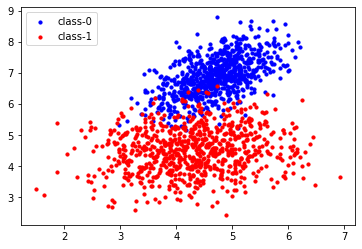

In [12]:
plt.scatter(db1_ftrx1_c0, db1_ftrx2_c0,c ='blue', s = 10 , label = 'class-0')
plt.scatter(db1_ftrx1_c1,db1_ftrx2_c1,c ='red', s = 10 , label = 'class-1')
plt.legend(loc = "upper left")

In [13]:
#Implement PART B:
print('database0 class 0')
mean_db0_c0 = np.mean(df1_class0, axis = 0)
print('mean')
print(mean_db0_c0)
print('covariance')
print(cov_mtrx1_db0_class0, end = "\n\n")

print('database0 class 1')
mean_db0_c1 = np.mean(df1_class1, axis = 0)
print('mean')
print(mean_db0_c1)
print('covariance')
print(cov_mtrx2_db0_class1, end = "\n\n")

print('database1 class 0')
mean_db1_c0 = np.mean(df2_class0, axis = 0)
print('mean')
print(mean_db1_c0)
print('covariance')
print(cov_mtrx3_db1_class0, end = "\n\n")

print('database1 class 1')
mean_db1_c1 = np.mean(df2_class1, axis = 0)
print('mean')
print(mean_db1_c1)
print('covariance')
print(cov_mtrx4_db1_class1, end = "\n\n")

database0 class 0
mean
x1    4.2
x2    5.7
dtype: float64
covariance
[[0.30779503 0.20875556]
 [0.20875556 0.403941  ]]

database0 class 1
mean
x1    4.0
x2    4.8
dtype: float64
covariance
[[0.30779503 0.20875556]
 [0.20875556 0.403941  ]]

database1 class 0
mean
x1    4.691560
x2    6.889336
dtype: float64
covariance
[[0.29913689 0.19183728]
 [0.19183728 0.3972486 ]]

database1 class 1
mean
x1    4.297250
x2    4.504441
dtype: float64
covariance
[[0.77441134 0.08920795]
 [0.08920795 0.52736643]]



In [14]:
testSet1 = pd.read_csv("test1.csv")
testSet2 = pd.read_csv("test2.csv")

def det_calculator(matrix):
    a = matrix[0][0]
    b = matrix[0][1]
    c = matrix[1][0]
    d = matrix[1][1]
    det = (a*d) - (b*c)
    return det

def priorprobability(class_number,database):
    prior_prob = len(database[database['y']==class_number]) / len(database)
    return prior_prob

prior_prob_db0_c0 = priorprobability(0,df1)
prior_prob_db0_c1 = priorprobability(1,df1)
prior_prob_db1_c0 = priorprobability(0,df2)
prior_prob_db1_c1 = priorprobability(1,df2)

def covariance_matrix_inverter(matrix):
    a = matrix[0][0]
    b = matrix[0][1]
    c = matrix[1][0]
    d = matrix[1][1]
    det = a*d - b*c
    return np.matrix([[d / det, -b / det], [-c / det, a / det]])

def matrix_equality_check(matrix1,matrix2):
    if (matrix1[0][0] == matrix2[0][0] and matrix1[0][1] == matrix2[0][1] and matrix1[1][0] == matrix2[1][0] and
        matrix1[1][1] == matrix2[1][1]):
        return True
    else:
        return False

    
def trainBayes(mean0, mean1, covmat0, covmat1, prob0, prob1):
    ln_prob0 = math.log(prob0)
    ln_prob1 = math.log(prob1)
    mean0 = np.matrix([[mean0['x1']], [mean0['x2']]])
    transpose_mean0 = mean0.transpose()
    mean1 = np.matrix([[mean1['x1']], [mean1['x2']]])
    transpose_mean1 = mean1.transpose()
    invers_covmat0 = covariance_matrix_inverter(covmat0)
    invers_covmat1 = covariance_matrix_inverter(covmat1)
    isgeneral = True
    c0 = 0
    c1 = 0
    if matrix_equality_check(covmat0,covmat1):
        a0 = np.matmul(transpose_mean0,invers_covmat0)
        b0 = ln_prob0 + (-0.5 * np.matmul(np.matmul(transpose_mean0,invers_covmat0),mean0))[0][0]
        
        a1 = np.matmul(transpose_mean1,invers_covmat1)
        b1 = ln_prob1 + (-0.5 * np.matmul(np.matmul(transpose_mean1,invers_covmat1),mean1))[0][0]
        
        isgeneral= False
    else : #general case
        
        det_class_0 = det_calculator(covmat0)
        det_class_1 = det_calculator(covmat1)
        
        a0 = np.matmul(transpose_mean0,invers_covmat0)
        b0 = ln_prob0 + (-0.5 * np.matmul(a0,mean0)) - (0.5 * math.log(np.abs(det_class_0)))
        c0 = -0.5 * invers_covmat0
        
        a1 = np.matmul(transpose_mean1,invers_covmat1)
        b1 = ln_prob1 + (-0.5 * np.matmul(a1,mean1)) - (0.5 * math.log(np.abs(det_class_1)))
        c1 = -0.5 * invers_covmat1       
        
    return a0, b0, a1, b1, isgeneral, c0 , c1

def classify(x, isgeneral, a0, b0, a1, b1,c0,c1):
    if isgeneral == False:
        class0_prob = np.dot(a0,x) + b0
        
        class1_prob = np.dot(a1,x) + b1
        
        if(class0_prob > class1_prob):
            return 0
        else:
            return 1
    else:
        c0 = np.matmul(x.transpose(),np.matmul(c0,x))
        
        c1 = np.matmul(x.transpose(),np.matmul(c1,x))
        
        class0_prob = c0 + np.dot(a0,x) + b0
        
        class1_prob = c1 + np.dot(a1,x) + b1
        
        if(class0_prob > class1_prob):
            return 0
        else:
            return 1


def calculateError(testSet, isgeneral, a0, b0, a1, b1, c0, c1):
    error_count = 0
    for i, row in testSet.iterrows():
        test_sample = np.matrix([[row.x1], [row.x2]])
        if classify(test_sample, isgeneral, a0, b0, a1, b1,c0,c1) != row['y']:
            error_count += 1
            
    return (error_count / len(testSet)) * 100        
        

a0 , b0 , a1 , b1, isgeneral, c0 , c1= trainBayes(mean_db0_c0,mean_db0_c1,
                                              cov_mtrx1_db0_class0,cov_mtrx2_db0_class1,
                                              prior_prob_db0_c0,prior_prob_db0_c1)


print("Test Set 1 Error: ", calculateError(testSet1, isgeneral, a0, b0, a1, b1, c0,c1), "%.")


a0 , b0 , a1 , b1, isgeneral, c0 , c1= trainBayes(mean_db1_c0,mean_db1_c1,
                                              cov_mtrx3_db1_class0,cov_mtrx4_db1_class1,
                                              prior_prob_db1_c0,prior_prob_db1_c1)


print("Test Set 2 Error: ", calculateError(testSet2, isgeneral, a0, b0,   a1, b1, c0,c1), "%.")


Test Set 1 Error:  20.0 %.
Test Set 2 Error:  3.0 %.


In [15]:
#Implement PART C:
kf = KFold(n_splits=3, random_state = random.seed(1773), shuffle=True)

concatenated = np.concatenate((df1, testSet1), axis=0)

average = 0

for train_index, test_index in kf.split(concatenated):
    train_set = concatenated[train_index]
    test_set = concatenated[test_index]
    train_set = pd.DataFrame(train_set)
    test_set = pd.DataFrame(test_set)
    train_set.columns = ['x1','x2','y']
    test_set.columns = ['x1','x2','y']
    
    crval_c0_withy = train_set[train_set['y']==0]
    crval_c0 = crval_c0_withy[['x1','x2']]
    
    crval_c1_withy = train_set[train_set['y']==1]
    crval_c1 = crval_c1_withy[['x1','x2']]
        
    crval_c0_covmat = covariance_matrix_calculator(crval_c0)
    crval_c1_covmat = covariance_matrix_calculator(crval_c1)

    crval_c0_covmat = crval_c0_covmat.round(8)
    crval_c1_covmat = crval_c1_covmat.round(8)

    crval_c0_mean = np.mean(crval_c0, axis = 0)
    crval_c1_mean = np.mean(crval_c1, axis = 0)
    
    prior_prob_crval_c0 = priorprobability(0,train_set)
    prior_prob_crval_c1 = priorprobability(1,train_set)
    
    a0 , b0 , a1 , b1, isgeneral, c0 , c1= trainBayes(crval_c0_mean,crval_c1_mean,
                                              crval_c0_covmat,crval_c1_covmat,
                                              prior_prob_db0_c0,prior_prob_db0_c1)
    average += calculateError(test_set, isgeneral, a0, b0,
                                           a1, b1, c0,c1)
    print("Test Set Error: ", calculateError(test_set, isgeneral, a0, b0,
                                           a1, b1, c0,c1), "%.")
    
average = average / 3
print("Average error of Database1", average)

Test Set Error:  21.0 %.
Test Set Error:  24.0 %.
Test Set Error:  20.0 %.
Average error of Database1 21.666666666666668


In [16]:
kf = KFold(n_splits=3, random_state = random.seed(1773), shuffle=True)

concatenated = np.concatenate((df2, testSet2), axis=0)

average = 0

for train_index, test_index in kf.split(concatenated):
    train_set = concatenated[train_index]
    test_set = concatenated[test_index]
    train_set = pd.DataFrame(train_set)
    test_set = pd.DataFrame(test_set)
    train_set.columns = ['x1','x2','y']
    test_set.columns = ['x1','x2','y']
    
    crval_c0_withy = train_set[train_set['y']==0]
    crval_c0 = crval_c0_withy[['x1','x2']]
    
    crval_c1_withy = train_set[train_set['y']==1]
    crval_c1 = crval_c1_withy[['x1','x2']]
        
    crval_c0_covmat = covariance_matrix_calculator(crval_c0)
    crval_c1_covmat = covariance_matrix_calculator(crval_c1)

    crval_c0_covmat = crval_c0_covmat.round(8)
    crval_c1_covmat = crval_c1_covmat.round(8)

    crval_c0_mean = np.mean(crval_c0, axis = 0)
    crval_c1_mean = np.mean(crval_c1, axis = 0)
    
    prior_prob_crval_c0 = priorprobability(0,train_set)
    prior_prob_crval_c1 = priorprobability(1,train_set)
    
    a0 , b0 , a1 , b1, isgeneral, c0 , c1= trainBayes(crval_c0_mean,crval_c1_mean,
                                              crval_c0_covmat,crval_c1_covmat,
                                              prior_prob_db0_c0,prior_prob_db0_c1)
    average += calculateError(test_set, isgeneral, a0, b0,
                                           a1, b1, c0,c1)
    print("Test Set Error: ", calculateError(test_set, isgeneral, a0, b0,
                                           a1, b1, c0,c1), "%.")
    
average = average / 3
print("Average error of Database2", average)

Test Set Error:  3.4482758620689653 %.
Test Set Error:  3.8980509745127434 %.
Test Set Error:  2.5525525525525525 %.
Average error of Database2 3.299626463044754


# The error rate is pretty much the same in both strategies. But I think cross-validation strategy will be more reliable because we are changing test sets in every evaluation

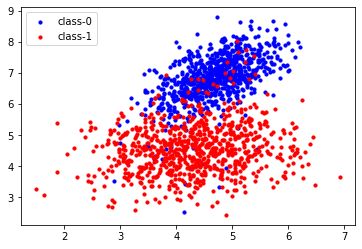

In [17]:
#Implement Part D:

dfm = pd.read_csv("train2_modified.csv") 
dfm_class0 = dfm[dfm['y']==0]
dfm_class0 = dfm_class0[['x1','x2']]

dfm_class1 = dfm[dfm['y']==1]
dfm_class1 = dfm_class1[['x1','x2']]

dfm_ftrx1_c0 = dfm_class0['x1']
dfm_ftrx2_c0 = dfm_class0['x2']

dfm_ftrx1_c1 = dfm_class1['x1']
dfm_ftrx2_c1 = dfm_class1['x2']

plt.scatter(dfm_ftrx1_c0, dfm_ftrx2_c0,c ='blue', s = 10 , label = 'class-0')
plt.scatter(dfm_ftrx1_c1,dfm_ftrx2_c1,c ='red', s = 10 , label = 'class-1')
plt.legend(loc = "upper left")


# There are many outliers on modified database.

In [18]:
cov_mtrx_df0_class0 = covariance_matrix_calculator(dfm_class0)
cov_mtrx_df0_class1 = covariance_matrix_calculator(dfm_class1)

cov_mtrx_df0_class0 = cov_mtrx_df0_class0.round(8)
cov_mtrx_df0_class1 = cov_mtrx_df0_class1.round(8)

mean_df_c0 = np.mean(df1_class0, axis = 0)
mean_df_c1 = np.mean(df1_class1, axis = 0)

prior_prob_df_c0 = priorprobability(0,dfm)
prior_prob_df_c1 = priorprobability(1,dfm)
    
a0 , b0 , a1 , b1, isgeneral, c0 , c1= trainBayes(mean_df_c0 , mean_df_c1,
                                              cov_mtrx_df0_class0 , cov_mtrx_df0_class1,
                                              prior_prob_df_c0,prior_prob_df_c1)

print("Test Set 3 Error: ", calculateError(testSet1, isgeneral, a0, b0,
                                           a1, b1, c0,c1), "%.")

Test Set 3 Error:  27.0 %.


# Bayes classifier performs poorly on databases that have many outliers. 